<div style="padding-bottom:30px">
<a href="http://iqtk.io"><img src="https://discover.iqtk.io/assets/logotype_blue_small.png" style="width:100px; margin-left:0px"></img></a>
<p style="color:#9E9E9E">
<a href="http://iqtk.io">Getting Started Guide</a> // <a href="https://goo.gl/forms/2cOmuUrQ3n3CKpim1">Documentation Feedback</a></p>
</div>

<h1 style="color:#9E9E9E">Metabolomics data preprocessing</h1>

In this tutorial we initiate a distributed file conversion of Agilent .d files into .mzML from the DataFlow UI permitting downstream analysis with XCMS3 or alternative tools.

There is some background reading so once you've completed the [getting started documentation]() you'll be ready for this tutorial!

<h2 style="color:#9E9E9E">Required Data and Parameterization</h2>

The starting point for this workflow is the following:

<ul style="font-size:15px">
<ol><b>1. Agilent .d archives:</b> GCS path to a file listing Agilent .d files to convert.</ol>
</ul>

Each of these should be present on Google Cloud Storage. Next we discuss two of the following three ways workflows can be triggered.

<ul style="font-size:15px">
<ol>1. Using the `iqtk` command-line tool</ol>
<ol>2. Programmatically in response to an instrument data sync event.</ol>

</ul>

<h3 style="color:#9E9E9E">Parameterization from the command-line</h2>

Initiating workflow runs from the command line requires that the `iqtk` utility is installed on your system (such as via `pip install iqtk`) and that you have authenticated with GCP to access the APIs and file objects referenced by and required for your run. Provided these, a workflow can be initiated using the following command provided a JSON config file like the one following that.

In [ ]:
%%bash
iqtk run metabolomics --config=path_to_your_config.json

```json
{
  "local": false,
  "cloud": true,
  "debug": true,
  "archives": [
    "gs://iqtk/ms/jgin/f01.d.tgz"
   ]
}

```

Once our job is submitted we'll be able to check its status using the Cloud DataFow UI (as described in the [getting started documentation]()) which should look like the following:

<img src="https://discover.iqtk.io/assets/wf-sshot-metabolomics.png" style="padding:20px; max-height:1000px"></img>

For the interested you can check out the full code for this workflow [here](https://github.com/iqtk/iqtk/blob/master/inquiry/toolkit/metabolomics/workflow.py).

<h2 style="color:#9E9E9E">Exploring the data</h2>

When the workflow is complete you can obtain the path in Google Cloud Storage to the resulting converted files as described in the [getting started documentation](). Currently the processing of these files directly into BigQuery database entries is not part of the core pipeline and can instead be run from [this](https://github.com/iqtk/iqtk/blob/master/inquiry/docs/tutorials/analyze-metabolite-mdvs-xcms3.ipynb) R kernel jupyter notebook. What follows is an illustration of how a complete metabolomics dataset can be browsed and obtained from BigQuery for subsequent analysis. First, a screenshot of the BigQuery UI showing a metabolomics dataset:

<img src="https://discover.iqtk.io/assets/bq-sshot-metabolomics.png" style="padding:20px; max-height:400px"></img>

Next we'll pull down a subset of this data from BigQuery into a Pandas data_frame permitting further exploratory and interactive usage.

In [3]:
import google.datalab.bigquery as bq
query = bq.Query('SELECT * FROM `jbei-cloud.metabolomics.feihnexample3` LIMIT 3')
output_options = bq.QueryOutput.table(use_cache=False)
result = query.execute(output_options=output_options).result()
result.to_dataframe()

,Samples,Factors,_1_2_4_benzenetriol,_1_monostearin,_2_hydroxyvaleric_acid,_3_phosphoglycerate,_5_hydroxynorvaline_NIST,adenosine,adenosine_5_monophosphate,adipic_acid,...,_222169,_222058,_222051,_222047,_222036,_222029,_199553,_199322,_207188,_199232
0,LabF_115909,Arabidopsis Genotype:fatb-ko KD; At1g08510 | P...,3566,450,931,2005,2403,407,1650,8148,...,254,358,788,2015,7857,1496,378,1440,916,324
1,LabF_115904,Arabidopsis Genotype:fatb-ko KD; At1g08510 | P...,1874,987,771,2039,2297,538,2153,2197,...,254,602,949,1952,5013,1840,443,1498,980,321
2,LabF_115914,Arabidopsis Genotype:fatb-ko KD; At1g08510 | P...,1945,1910,1114,1496,2598,575,2204,2149,...,651,751,721,919,5963,1870,425,1423,1006,228


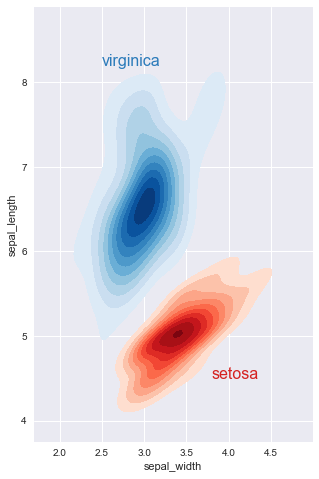

In [1]:
# TODO: At this point, we can do anything that can be done with a pandas dataframe. For example:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

<h3 style="color:#9E9E9E">References</h3>

1. Michael Droettboom, Thomas A Caswell, John Hunter, Eric Firing, Jens Hedegaard Nielsen, Nelle Varoquaux, … Nikita Kniazev. (2017). matplotlib/matplotlib v2.0.1 [Data set]. Zenodo. http://doi.org/10.5281/zenodo.570311
2. Gatto L and Lilley K (2012). “MSnbase - an R/Bioconductor package for isobaric tagged mass spectrometry data visualization, processing and quantitation.” Bioinformatics, 28, pp. 288-289.
3. Smith, C.A., Want, E.J., O'Maille, G., Abagyan,R., Siuzdak and G. (2006). “XCMS: Processing mass spectrometry data for metabolite profiling using nonlinear peak alignment, matching and identification.” Analytical Chemistry, 78, pp. 779–787.
4. Tautenhahn R, Boettcher C and Neumann S (2008). “Highly sensitive feature detection for high resolution LC/MS.” BMC Bioinformatics, 9, pp. 504.
5. Benton HP, Want EJ and Ebbels TMD (2010). “Correction of mass calibration gaps in liquid chromatography-mass spectrometry metabolomics data.” BIOINFORMATICS, 26, pp. 2488.

<h3 style="color:#9E9E9E">Contact</h3>

Want to get in touch? You can [provide feedback](https://goo.gl/forms/2cOmuUrQ3n3CKpim1) regarding this or other documentation,
[reach out to us](https://goo.gl/forms/j8FWdNJqABAoJvcW2) regarding collaboration, or [request a new feature or analytical capability](https://goo.gl/forms/dQm3SDcoNZsV7AAd2). We're looking forward to hearing from you!

<div style="padding-top: 30px">
<p style="color:#9E9E9E; text-align:center">This notebook was prepared as part of the <a href="https://github.com/iqtk/iqtk">Inquiry Toolkit</a> project at the Joint BioEnergy Institute (JBEI). Learn more at https://www.jbei.org/.</p>
<p style="color:#9E9E9E; text-align:center">The Joint BioEnergy Institute is a program of the U.S. Department of Energy Office of Science.</p>
<p style="color:#9E9E9E; text-align:center">© Regents of the University of California, 2017. Licensed under a BSD-3 <a href="https://github.com/iqtk/iqtk/blob/master/LICENSE">license</a>.</p>
<img src="https://discover.iqtk.io/assets/logotype_blue_small.png" style="width:100px"></img>
</div>